<a href="https://colab.research.google.com/github/ys7yoo/intro_ai/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab. Supervised learning - linear regression

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

# import LinearRregression !
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## load the Boston data set

* Housing Values in Suburbs of Boston
* The Boston data frame has 506 rows and 14 columns.
* This data frame contains the following columns:
  * crim: per capita crime rate by town.
  * zn: proportion of residential land zoned for lots over 25,000 sq.ft.
  * indus: proportion of non-retail business acres per town.
  * chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
  * nox: nitrogen oxides concentration (parts per 10 million).
  * rm: average number of rooms per dwelling.
  * age: proportion of owner-occupied units built prior to 1940.
  * dis: weighted mean of distances to five Boston employment centres.
  * rad: index of accessibility to radial highways.
  * tax: full-value property-tax rate per \$10,000.
  * ptratio: pupil-teacher ratio by town.
  * black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
  * lstat: lower status of the population (percent).
  * medv: median value of owner-occupied homes in \$1000s.
* Source
  * Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for   clean air. J. Environ. Economics and Management 5, 81–102.
  * Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [2]:
url = 'https://raw.githubusercontent.com/ys7yoo/intro_ai/master/data/Boston.csv'
Boston = pd.read_csv(url)

print(Boston.shape)
Boston.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# descriptions of each column
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# simple linear regression - use one predictor

Let's use Ordinary Least Squares in scikit-learn package. You can find more information [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [4]:
X = Boston[['lstat']]
y = Boston[['medv']]
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[-0.95004935]]), array([34.55384088]))

In [5]:
# R2 score (the larger, the better)
# https://en.wikipedia.org/wiki/Coefficient_of_determination
lin_reg.score(X,y)

0.5441462975864797

Text(0, 0.5, 'medv')

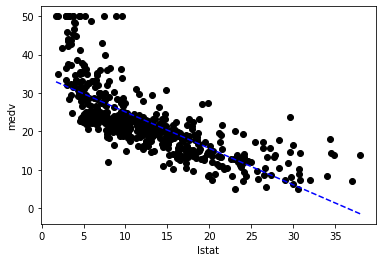

In [6]:
# scatter plot of the data
plt.scatter(Boston.lstat, Boston.medv, color='k')  

# plot estimated linear model
X_new = [[Boston.lstat.min()], [Boston.lstat.max()]]
Y_pred = lin_reg.predict(X_new)  # predict

plt.plot(X_new, Y_pred, 'b--')
plt.xlabel("lstat")
plt.ylabel("medv")

## Multiple linear regression - use multiple predictors

In [7]:
# add age to predictor!
X = Boston[["lstat",'ptratio']]
y = Boston[["medv"]]
lin_reg = LinearRegression()  # You may see a warning on OSX. But, it's OK. (https://github.com/scipy/scipy/issues/5998)
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[-0.82017957, -1.1452515 ]]), array([54.04681786]))

In [8]:
# R2 score
lin_reg.score(X,y)  # R2 slightly increases

0.6066546153493116

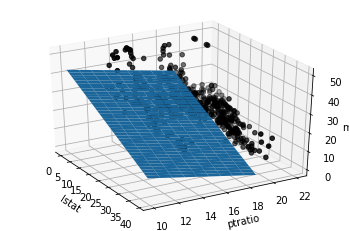

In [9]:
from mpl_toolkits.mplot3d import Axes3D 

xx, yy = np.mgrid[:40, 10:20]

fig = plt.figure()
ax = fig.gca(projection='3d')

pred = lin_reg.predict(np.column_stack([xx.ravel(), yy.ravel()]))
ax.plot_surface(xx, yy, pred.reshape(xx.shape))

ax.scatter(Boston[["lstat"]], Boston[["ptratio"]], Boston[["medv"]], color='k')

ax.set_xlabel('lstat')
ax.set_ylabel('ptratio')
ax.set_zlabel('medv')

ax.view_init(30, -30)